# Import Necesarry Libraries and Files

In [22]:
# Libraries
import pymssql
import nbformat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Files
%run ./SQL_Server_settings.ipynb

# Connecting Python with SQL Server

In [2]:
# Creating connection
conn = pymssql.connect(
    server = server,
    user = user,
    password = password,
    database = "Console_And_Gaming",
    as_dict=True
)
# Creating cursor
cursor = conn.cursor()

# Creating Data to Visualization

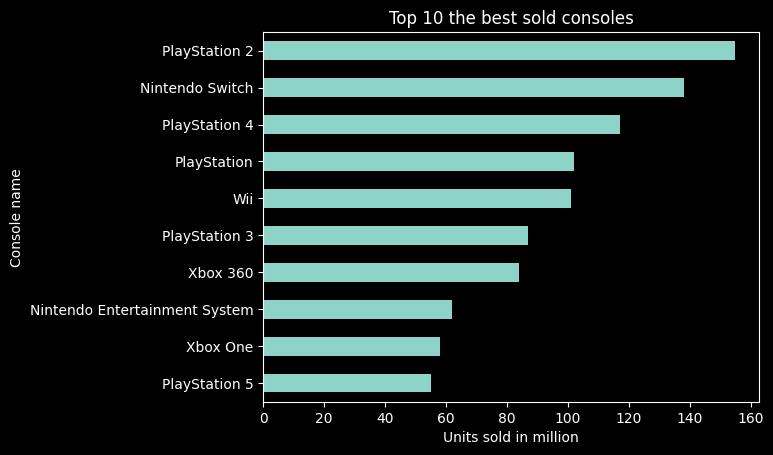

In [3]:
# SQL query - top 10 Consoles
top_10_Consoles = '''
SELECT TOP 10 Console_Name,
    Units_sold_in_million
FROM Console
ORDER BY Units_sold_in_million DESC
'''
cursor.execute(top_10_Consoles)
records = cursor.fetchall()

# Creating dataframe in Pandas
df = pd.DataFrame(records)

# Changing values type in Units_sold_in_million column
df["Units_sold_in_million"] = df["Units_sold_in_million"].astype(int)

# Creating bar chart
plt.style.use('dark_background')
df.sort_values("Units_sold_in_million", ascending = True).plot.barh(x = "Console_Name", y = 'Units_sold_in_million')
plt.title("Top 10 the best sold consoles")
plt.xlabel("Units sold in million")
plt.ylabel("Console name")
plt.legend().remove()

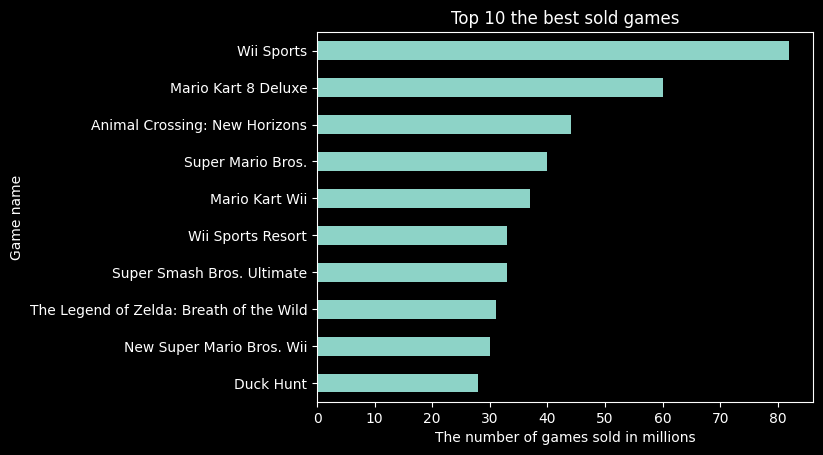

In [4]:
# Creating Top 10 Games
top_10_Games = '''
SELECT TOP 10 Game_Name,
    Units_m
FROM Games
ORDER BY Units_m DESC
'''
cursor.execute(top_10_Games)
records_games = cursor.fetchall()

# Creating dataframe in Pandas
df_games = pd.DataFrame(records_games)

# Changing values type in Units_m column
df_games["Units_m"] = df_games["Units_m"].astype(int)

# Creating bar chart
plt.style.use('dark_background')
df_games.sort_values("Units_m", ascending = True).plot.barh(x = "Game_Name", y = "Units_m")
plt.xlabel("The number of games sold in millions")
plt.ylabel("Game name")
plt.title("Top 10 the best sold games")
plt.legend().remove()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531 entries, 0 to 5530
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Release_Year             5530 non-null   object
 1   Total_Units_Sold_in_mln  5531 non-null   object
dtypes: object(2)
memory usage: 86.5+ KB
None
                        Release_Year  Total_Units_Sold_in_mln
count                           5530              5530.000000
mean   2006-01-15 03:33:47.197106688                 1.460322
min              1977-01-01 00:00:00                 0.000000
25%              1999-08-02 12:00:00                 0.000000
50%              2005-10-20 12:00:00                 0.110000
75%              2014-01-04 18:00:00                 0.990000
max              2070-01-01 00:00:00                94.040000
std                              NaN                 4.133230


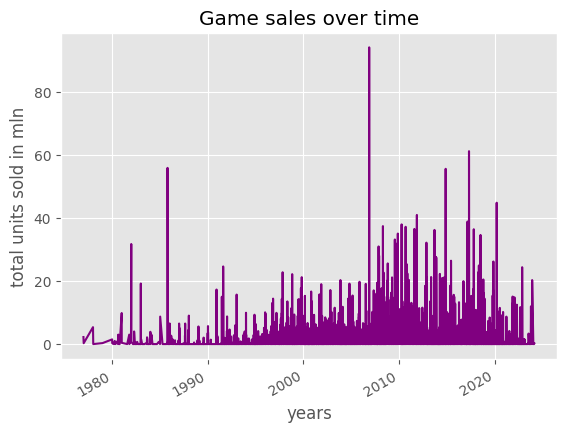

In [83]:
# Creating studying changes in game sales based on release years
game_change = '''
SELECT
    Release_Date AS Release_Year,
    SUM(Units_m) AS Total_Units_Sold_in_mln
FROM
    Games
GROUP BY
    Release_Date
ORDER BY
    Release_Date
'''
cursor.execute(game_change)
records_game_change = cursor.fetchall()

# Creating dataframe in Pandas
df_games_change = pd.DataFrame(records_game_change)

# Show info about types and empty values
print(df_games_change.info())

# Dropping NaN values
df_games_change = df_games_change.dropna()

# Change data types in columns "Release_Year" and "Total_Units_Sold_in_ml"
df_games_change['Release_Year'] = df_games_change['Release_Year'].astype("datetime64[ns]")
df_games_change['Total_Units_Sold_in_mln'] = df_games_change['Total_Units_Sold_in_mln'].astype(float)

# Show statistical analys
print(df_games_change.describe())

# Removing outlier values
df_games_change = df_games_change[df_games_change['Release_Year'] <= '2024-02-27']

# Creating a line char
plt.style.use('ggplot')
df_games_change.plot(x = "Release_Year", y = "Total_Units_Sold_in_mln", kind = 'line', color = 'purple')
plt.title("Game sales over time")
plt.xlabel("years")
plt.ylabel("total units sold in mln")
plt.legend().remove()

In [84]:
# Analysing life of consoles cycle
consoles_cycle = '''
SELECT
    Console_Name,
    Released_Year,
    Discontinuation_Year,
    Generation,
    SUM(Discontinuation_Year - Released_Year) [Years]
FROM
    Console
GROUP BY
    Console_Name,
    Released_Year,
    Discontinuation_Year,
    Generation
ORDER BY
    Generation
'''
cursor.execute(consoles_cycle)
records_consoles_cycle = cursor.fetchall()

# Creating dataframe in Pandas
df_consoles_cycle = pd.DataFrame(records_consoles_cycle)

,Console_Name,Released_Year,Discontinuation_Year,Generation,Years
0,Home Pong,1975,1978,1,3
1,Magnavox Odyssey,1972,1975,1,3
2,Atari 2600,1977,1992,2,15
3,Intellivision,1979,1990,2,11
4,Magnavox Odyssey 2,1978,1984,2,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Console_Name          26 non-null     object
 1   Released_Year         26 non-null     int64 
 2   Discontinuation_Year  26 non-null     int64 
 3   Generation            26 non-null     int64 
 4   Years                 26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB
None


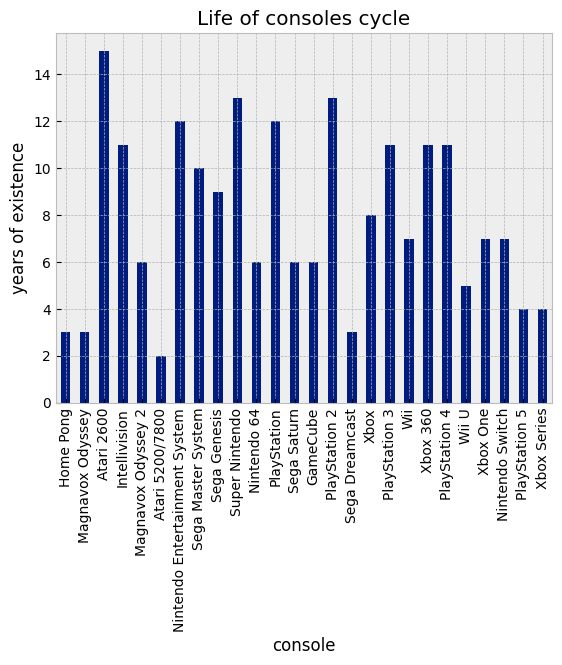

In [108]:
# Display the first five rows of data to verify that the data has been loaded correctly
display(df_consoles_cycle.head())

# Show info about types and empty values
print(df_consoles_cycle.info())

# Creating bar char
plt.style.use('seaborn-v0_8-dark-palette')
df_consoles_cycle.plot(x = "Console_Name", y = "Years", kind = "bar")
plt.title("Life of consoles cycle")
plt.xlabel("console")
plt.ylabel("years of existence")
plt.legend().remove()
